Plots for burden

Anxiety disorders


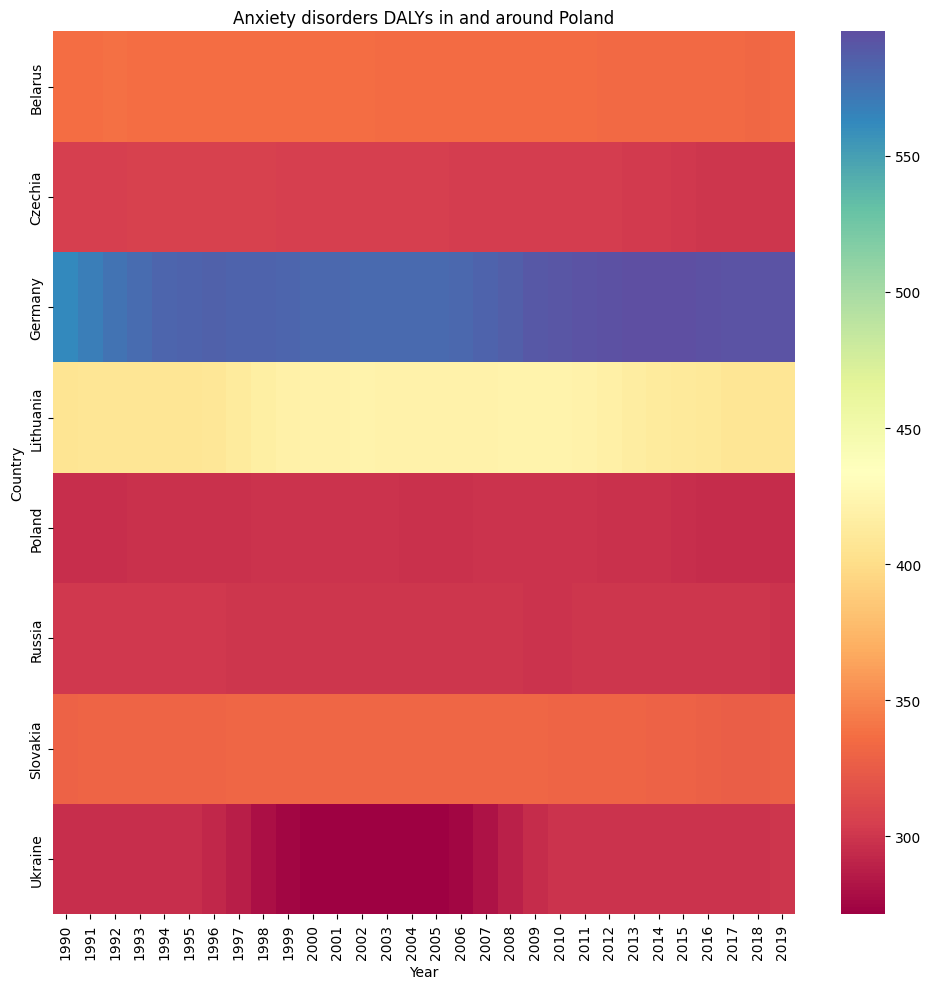

Bipolar disorder


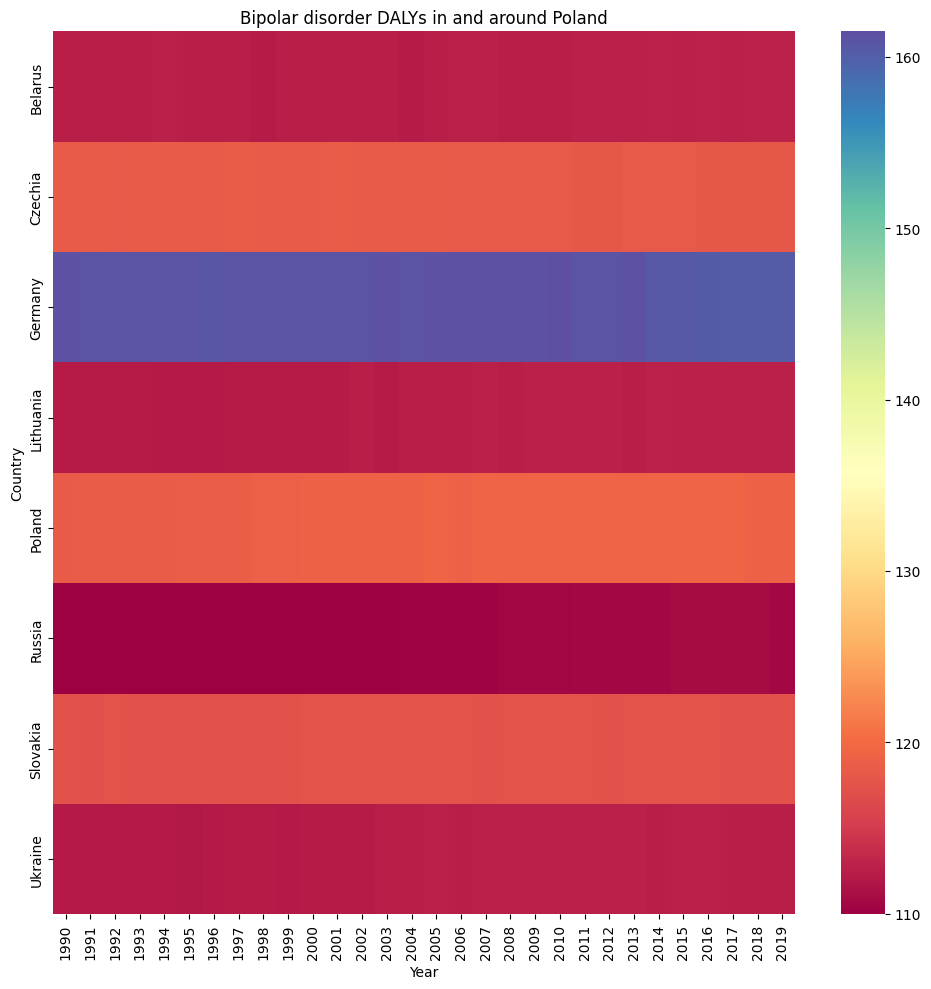

Depressive disorders


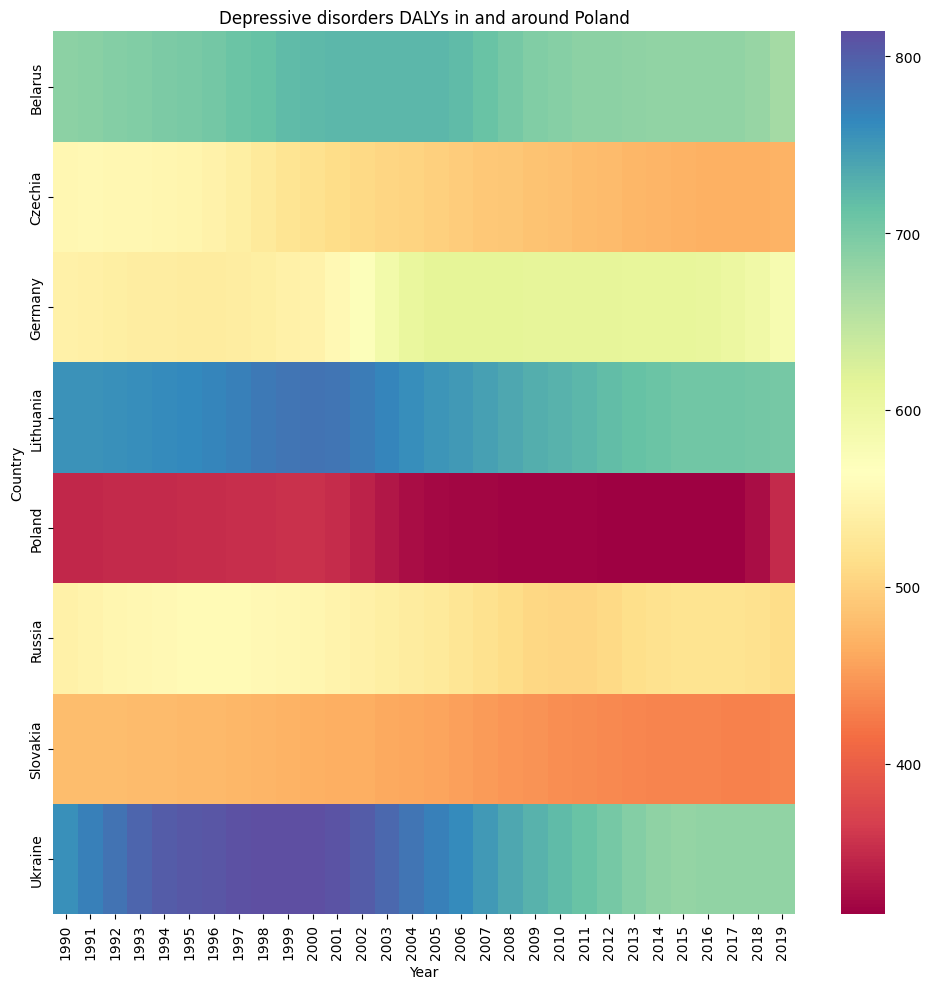

Eating disorders


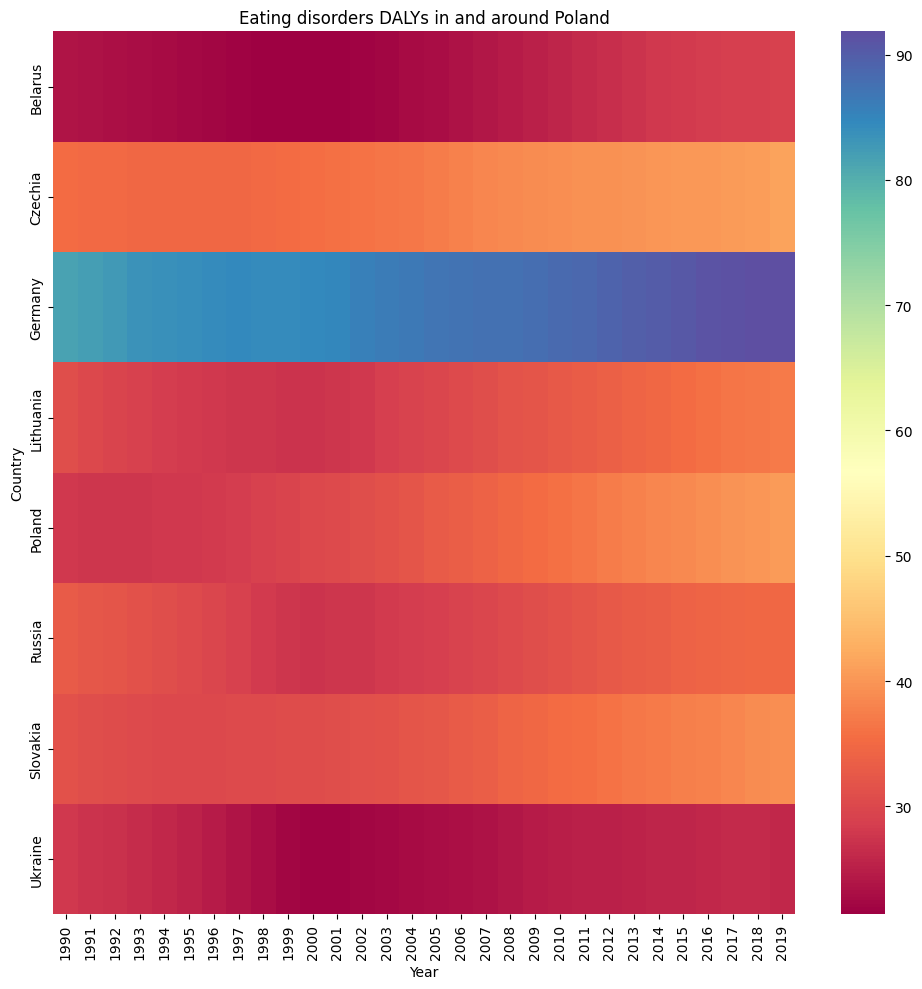

Schizophrenia


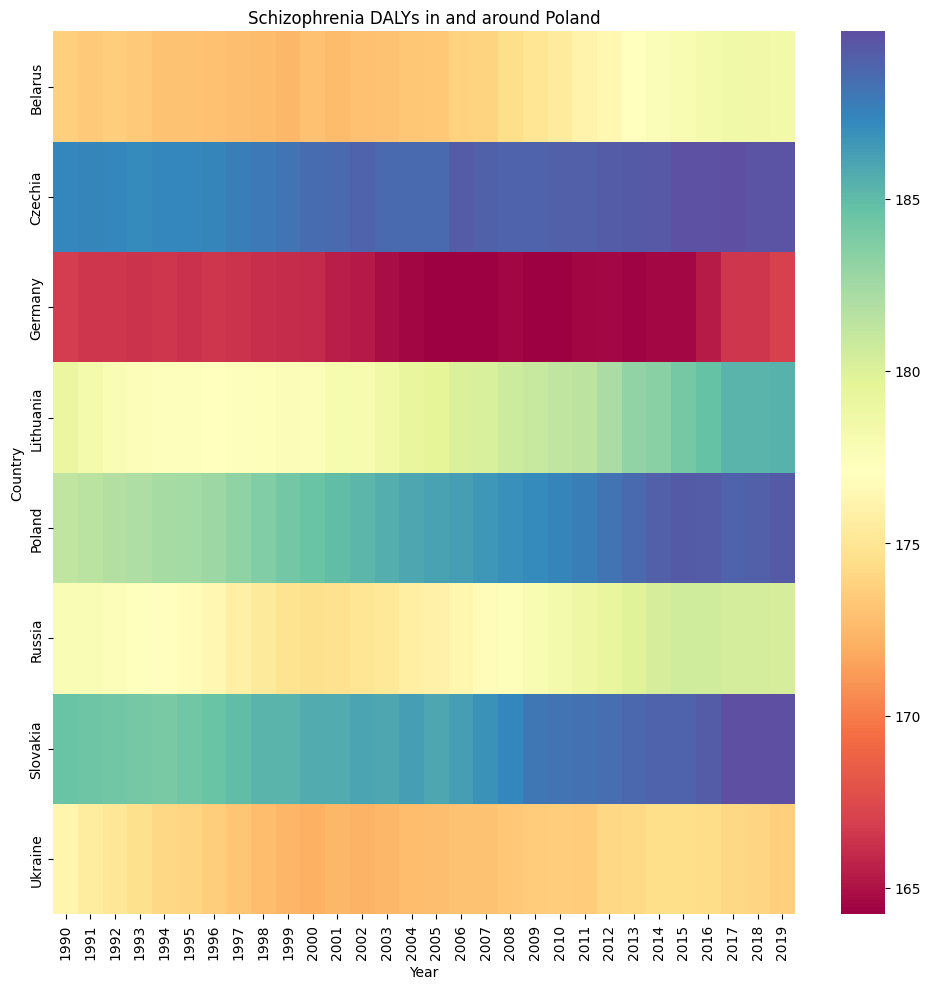

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

path="./../data/burden/*"

#get names of files in dir burden
files=glob.glob(path)

for disorder in files:
    data=pd.read_csv(disorder)
    data['DALYs'] = pd.to_numeric(data['DALYs'], errors='coerce')
    data['Year'] = data['Year'].astype(str)
    data = data.pivot(index='Country', columns='Year', values='DALYs')
    disorder=disorder.split("_")[1]
    print(disorder)

    plt.figure(figsize=(10,10))
    sns.heatmap(data, cmap='Spectral', fmt=".1f")

    plt.title(disorder+" DALYs in and around Poland")
    plt.ylabel("Country")
    plt.xlabel("Year")
    plt.tight_layout()


    plt.savefig("./../plots/burden_comparison_polandvsneighboors_"+disorder)
    plt.show()

Comparison of WHO data with average calculated for WHO regions

###DISASTER

In [6]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt





# for disorder in name_disorder:
#     plt.figure(figsize=(5,5))
#     plt.title(" DALYs for WHO and average: "+disorder)
#     plt.ylabel("DALYs")
#     plt.xticks(ticks=range(0, 30, 3))
#     plt.xlabel("Year")
#     plt.tight_layout()
#     data=pd.read_csv(path)
#     data=data[data["Disorder"]==disorder]
#     sns.pointplot(data=data,x="Year",y="DALYs", hue="Region",palette="dark")
#     for i in range(2):
#         data1=data[data["Source"]=="Average"]
#         sns.pointplot(data=data1,x="Year",y="DALYs", hue="Region",palette="dark")
#         data2=data[data["Source"]=="WHO"]
#         sns.pointplot(data=data2,x="Year",y="DALYs", hue="Region",palette="bright")
#     plt.show()


    

    
    


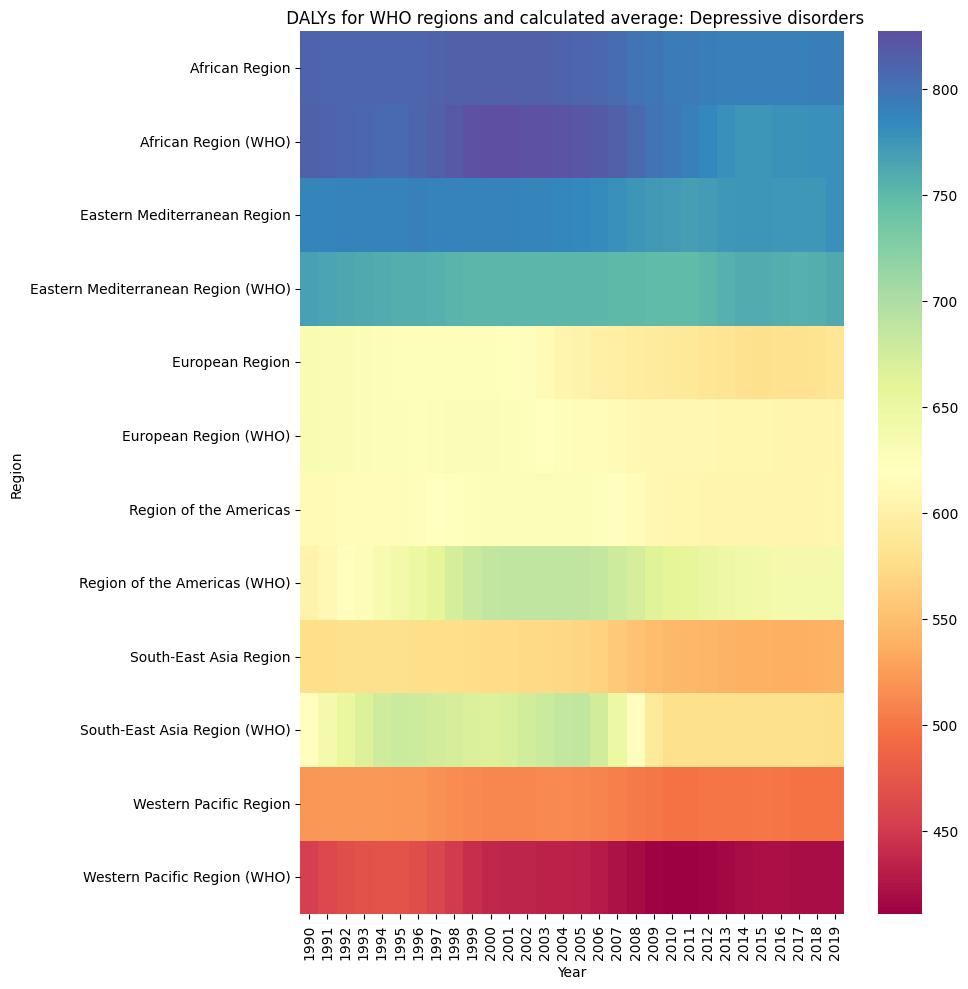

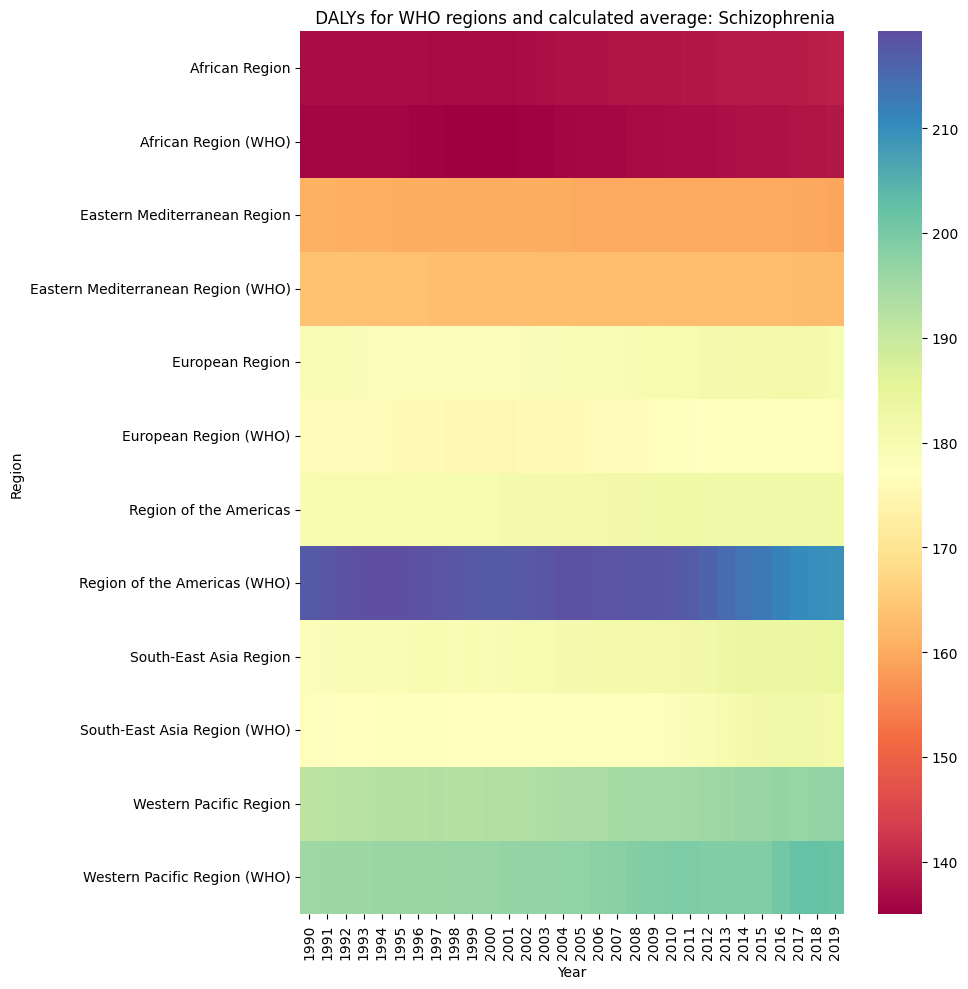

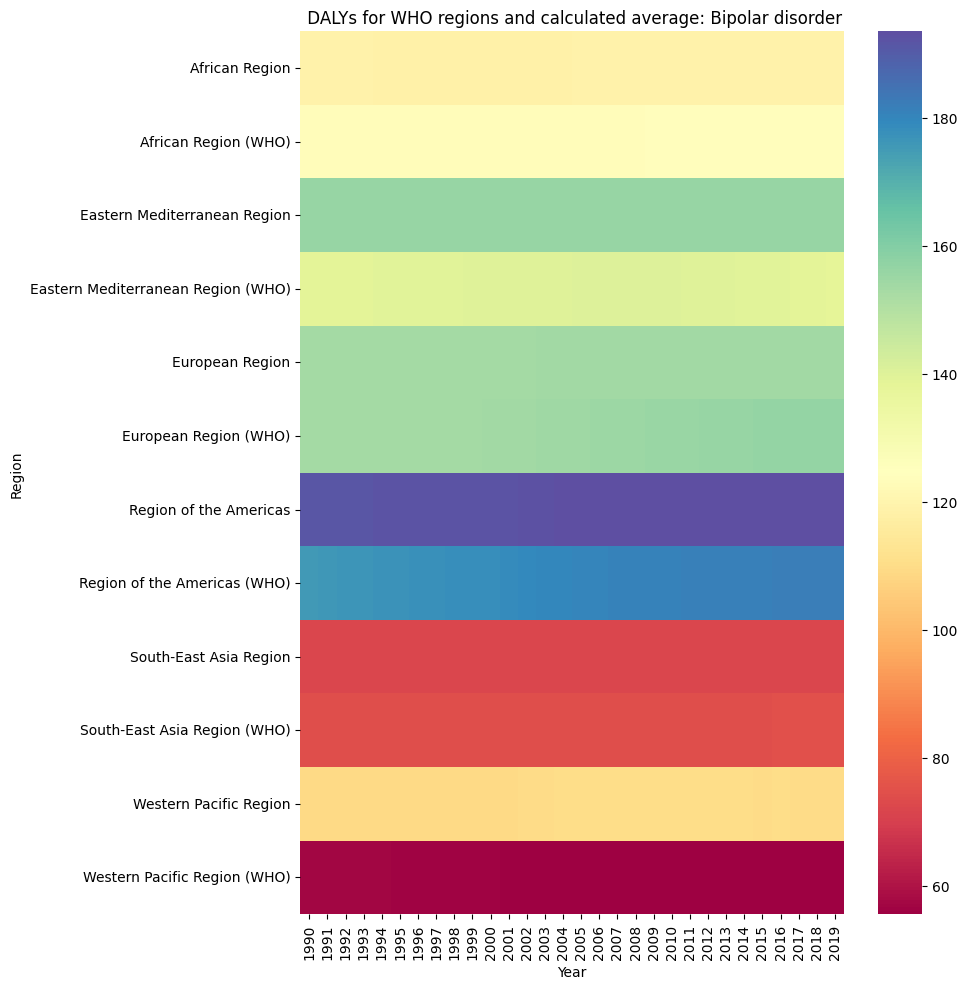

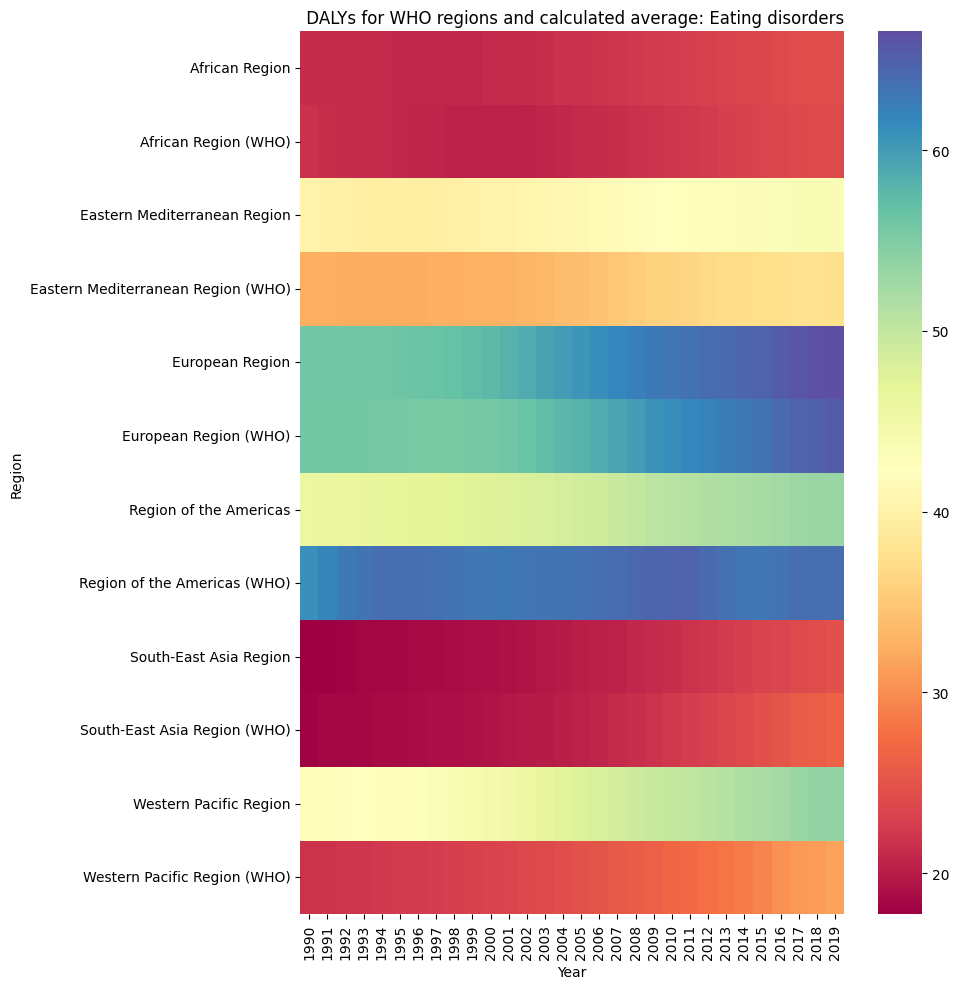

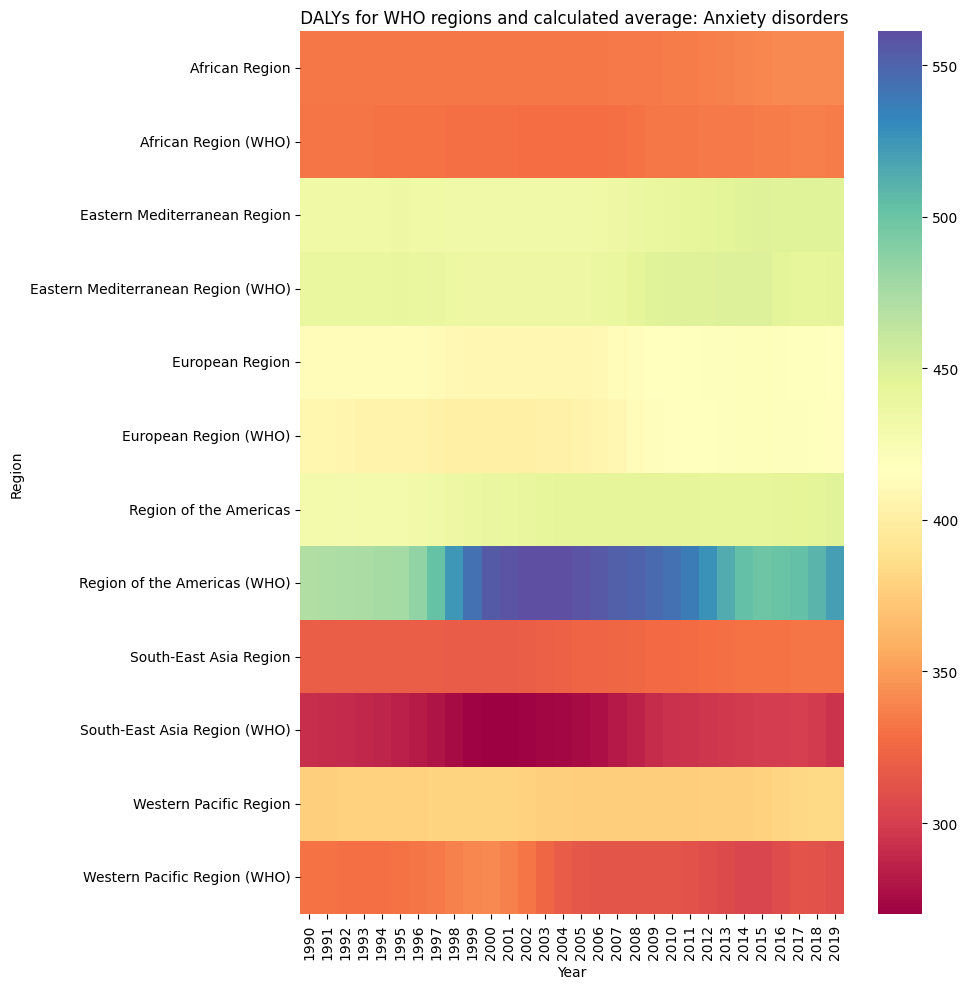

In [7]:
import pandas as pd
path="./../results/final_comparison.csv"

#Separation by disorder
datax=pd.read_csv(path)
disorders=datax["Disorder"].unique()

for disorder in disorders:
    data=pd.read_csv(path)
    data=data[data["Disorder"]==disorder]

    data['DALYs'] = pd.to_numeric(data['DALYs'], errors='coerce')
    data['Year'] = data['Year'].astype(str)
    
    data = data.pivot(index='Region', columns='Year', values='DALYs')

    plt.figure(figsize=(10,10))
    plt.title(" DALYs for WHO regions and calculated average: "+disorder)
    plt.xticks(ticks=range(0, 30, 3))
    plt.xlabel("Year")    
    sns.heatmap(data, cmap='Spectral', fmt=".1f")
    plt.ylabel("Region")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.savefig("./../plots/WHORegions"+disorder)
    plt.show()